In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
from IPython.display import HTML # Untuk menampilkan animasi di Jupyter/Colab

In [20]:
# 1. Paramater Domain
Lx,Ly = 10, 10  # Ukuran domain
Nx,Ny = 100, 100  # Jumlah grid

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# 2. Fungsi Persebaran Panas
def heatDistribution(x,y):
    temp1 = 100 * np.exp(-((x - Lx/4)**2 + (y - Ly/4)**2) / 2.0)
    # Pusat panas kedua
    temp2 = 200 * np.exp(-((x - 3*Lx/4)**2 + (y - 3*Ly/4)**2) / 1.5)
    
    
    #temp3 = 50 * np.exp(-((x - 3*Lx/4)**2 + (y - 3*Ly/4)**2) / 2.0)
    
    baseTemp = 20
    return baseTemp + temp1 + temp2 #+ temp3

tempContour = heatDistribution(X, Y)

def fitnessTemp(position):
    x,y = position
    temp = heatDistribution(x, y)
    return temp

# 3. Inisialisasi Partikel
numParticles = 1000
maxIter = 100
W = 0.5
C1 = 0.5
C2 = 0.5

xMinParticles, xMaxParticles = 0, Lx
yMinParticles, yMaxParticles = 0, Ly
maxVelocity = 0.1

positionsList = []
pBestPositionsList = []
pBestFitnessList = []
velocitiesList = []

# 4. Inisialisasi Partikel
# Inisialisasi posisi, kecepatan, dan fitness partikel
for particle in range(numParticles):
    position = np.array([random.uniform(xMinParticles, xMaxParticles), random.uniform(yMinParticles, yMaxParticles)])
    positionsList.append(position)
    
    pBestPositionsList.append(position.copy())
    
    pBestFitnessList.append(fitnessTemp(position))
    
    velocity = np.array([random.uniform(-maxVelocity, maxVelocity), random.uniform(-maxVelocity, maxVelocity)])
    velocitiesList.append(velocity)

positions = np.array(positionsList)
pBestPositions = np.array(pBestPositionsList)
pBestFitness = np.array(pBestFitnessList)
velocities = np.array(velocitiesList)

gBestIndex = np.argmax(pBestFitness)
gBestPositions = pBestPositions[gBestIndex].copy()
gBestFitness = pBestFitness[gBestIndex]

# Menyimpan pergerakan partikel untuk animasi
particlesPositionsHistory = []
gBestPositionsHistory = []
gBestFitnessHistory = []
# Menyimpan posisi awal partikel
particlesPositionsHistory.append(positions.copy())
gBestPositionsHistory.append(gBestPosition.copy())
gBestFitnessHistory.append(gBestFitness)

# 5. Algoritma PSO
for iter in range(maxIter):
    for _i in range(numParticles):
        # Hitung fitness partikel
        currentFitness =fitnessTemp(positions[_i])
        
        if currentFitness > pBestFitness[_i]:
            pBestPositions[_i] = positions[_i].copy()
            pBestFitness[_i] = currentFitness
            
        if currentFitness > gBestFitness:
            gBestPosition = positions[_i].copy()
            gBestFitness = currentFitness
            gBestIndex = _i
        
        # Update kecepatan
        r1 = np.random.rand(2)
        r2 = np.random.rand(2)
        cognitive = C1 * r1 * (pBestPositions[_i] - positions[_i])
        social = C2 * r2 * (gBestPositions - positions[_i])
        velocities[_i] = W * velocities[_i] + cognitive + social
        # Update posisi
        positions[_i] += velocities[_i]
        # Batasi posisi partikel dalam domain
        positions[_i][0] = np.clip(positions[_i][0], xMinParticles, xMaxParticles)
        positions[_i][1] = np.clip(positions[_i][1], yMinParticles, yMaxParticles)
    # Simpan posisi partikel dan gBest untuk animasi
    particlesPositionsHistory.append(positions.copy())
    gBestPositionsHistory.append(gBestPosition.copy())
    gBestFitnessHistory.append(gBestFitness)
# 6. Visualisasi Hasil
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.imshow(tempContour, extent=(0, Lx, 0, Ly), origin='lower', cmap='hot', alpha=0.5)

fig.colorbar(contour, ax=ax, label='Temperatur')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Particle Swarm Optimization (PSO) - Heat Distribution')

scatterParticles = ax.scatter([], [], c='blue', s=10, label='Partikel')
scatterGBest = ax.scatter([], [], c='red', s=50, label='Global Best')
ax.legend()

def iniAnimation():
    scatterParticles.set_offsets(np.empty((0, 2)))
    scatterGBest.set_offsets(np.empty((0, 2)))
    return scatterParticles, scatterGBest

def updateAnimation(frame):
    currentPost = particlesPositionsHistory[frame]
    currentGBest = gBestPositionsHistory[frame]
    scatterParticles.set_offsets(currentPost)
    scatterGBest.set_offsets(currentGBest.reshape(1, -1))
    ax.set_title(f'Iterasi: {frame + 1}, Global Best Fitness: {gBestFitnessHistory[frame]:.2f}')
    return scatterParticles, scatterGBest
ani = FuncAnimation(fig, updateAnimation, frames=len(particlesPositionsHistory), init_func=iniAnimation, blit=True, repeat=False)
plt.close(fig)  # Menutup plot agar tidak ditampilkan sebelum animasi
# Menampilkan animasi di Jupyter/Colab
HTML(ani.to_jshtml())

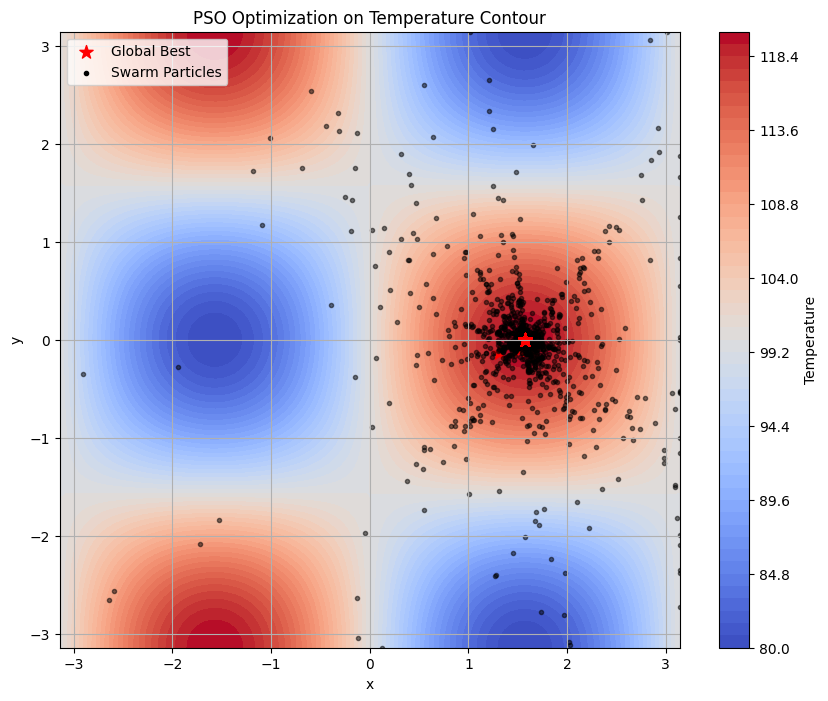

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Fungsi suhu (contoh)
def temperature(x, y):
    return 100 + 20 * np.sin(x) * np.cos(y)

# Parameter PSO
num_particles = 30
max_iterations = 100
w = 0.7
c1 = 1.5
c2 = 1.5

# Batasan wilayah
x_min, x_max = -np.pi, np.pi
y_min, y_max = -np.pi, np.pi

# Inisialisasi swarm
particles = []
for _ in range(num_particles):
    x = random.uniform(x_min, x_max)
    y = random.uniform(y_min, y_max)
    vx = random.uniform(-0.1, 0.1)
    vy = random.uniform(-0.1, 0.1)
    particles.append({
        'position': np.array([x, y]),
        'velocity': np.array([vx, vy]),
        'pbest_position': np.array([x, y]),
        'pbest_fitness': temperature(x, y)
    })

# Inisialisasi gbest
gbest_particle = max(particles, key=lambda p: p['pbest_fitness'])
gbest_position = gbest_particle['pbest_position']
gbest_fitness = gbest_particle['pbest_fitness']

# Buat kontur fungsi suhu
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = temperature(X, Y)

plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=50, cmap='coolwarm')
plt.colorbar(contour, label='Temperature')

# PSO loop
for iteration in range(max_iterations):
    for i, particle in enumerate(particles):
        # Evaluasi fitness
        fitness = temperature(*particle['position'])

        # Update pbest
        if fitness > particle['pbest_fitness']:
            particle['pbest_fitness'] = fitness
            particle['pbest_position'] = particle['position'].copy()

        # Update gbest
        if fitness > gbest_fitness:
            gbest_fitness = fitness
            gbest_position = particle['position'].copy()

        # Update kecepatan
        r1 = random.random()
        r2 = random.random()
        cognitive_component = c1 * r1 * (particle['pbest_position'] - particle['position'])
        social_component = c2 * r2 * (gbest_position - particle['position'])
        particle['velocity'] = w * particle['velocity'] + cognitive_component + social_component

        # Update posisi
        particle['position'] += particle['velocity']

        # Batasan posisi
        particle['position'][0] = np.clip(particle['position'][0], x_min, x_max)
        particle['position'][1] = np.clip(particle['position'][1], y_min, y_max)

    # Visualisasi swarm pada setiap iterasi (opsional, bisa diubah frekuensinya)
    swarm_x = [p['position'][0] for p in particles]
    swarm_y = [p['position'][1] for p in particles]
    plt.scatter(swarm_x, swarm_y, color='black', marker='.', alpha=0.5)
    plt.scatter(gbest_position[0], gbest_position[1], color='red', marker='*', s=100, label='Global Best' if iteration == 0 else "")

plt.scatter([], [], color='black', marker='.', label='Swarm Particles') # Dummy scatter for legend
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('PSO Optimization on Temperature Contour')
plt.grid(True)
plt.show()